In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'

In [2]:
import numpy as np
import pandas  as pd

In [3]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
a=df[df['Age']<18]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


In [13]:
b=df['Sex'].value_counts()


<BarContainer object of 2 artists>

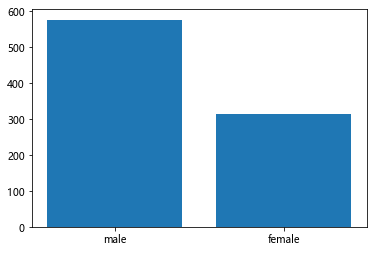

In [73]:
plt.bar(b.index,b)

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [5]:
df=df.fillna({'Cabin':0})

In [6]:
df['Cabin'].value_counts()

0              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [7]:
df['deck'] = df.Cabin.str.extract('([A-Za-z])')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,0,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


In [8]:
q=df['deck'].value_counts().sort_index()
q

A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
Name: deck, dtype: int64

In [9]:
p=df.groupby('deck')['Survived'].sum()
p

deck
A     7
B    35
C    35
D    25
E    24
F     8
G     2
T     0
Name: Survived, dtype: int64

In [10]:
list=[]
for i in range(8):
    a=p[i]/q[i]
    b=round(a,2)
    list.append(b)
list

[0.47, 0.74, 0.59, 0.76, 0.75, 0.62, 0.5, 0.0]

In [11]:
import numpy as np
import pandas as pd
m= pd.Series({'A':0.47,'B':0.74,'C':0.59,'D':0.76,'E':0.75,'F':0.62,'G':0.5,'T':0})
m

A    0.47
B    0.74
C    0.59
D    0.76
E    0.75
F    0.62
G    0.50
T    0.00
dtype: float64

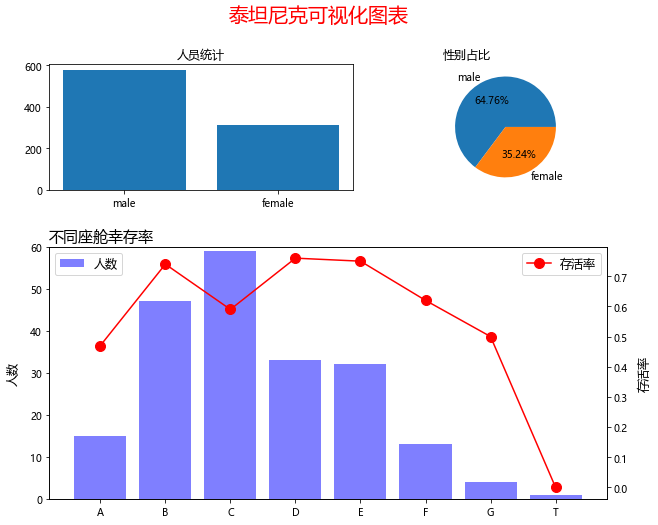

In [14]:


fig = plt.figure(figsize=(10, 8))
fig.suptitle("泰坦尼克可视化图表", size=20, fontdict={'family':'Microsoft YaHei', 'color': 'r'})
spec = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[3,2], height_ratios=[1,2])
ax = fig.add_subplot(spec[0, 0])
ax.bar(b.index,b)
ax.set_title("人员统计", loc='center', fontdict={'family':'Microsoft YaHei', 'color': 'k'})


ax = fig.add_subplot(spec[0, 1])
ax.pie(b,labels=['male','female'],autopct='%.2f%%')
ax.set_title("性别占比", loc='left', fontdict={'family':'Microsoft YaHei', 'color': 'k'})


# 第二行整块区域显示条形图
ax = fig.add_subplot(spec[1, :])
# 绘制柱形图
ax.set_title("不同座舱幸存率", fontdict={'family':'Microsoft YaHei', 'color': 'k', 'size': 15}, loc='left')
ax.bar(q.index,q, color='b', alpha=.5, label='人数')  # 绘制图像
ax.set_ylabel("人数", fontdict={'family':'Microsoft YaHei', 'color': 'k', 'size': 12}, labelpad=10)
ax.set_ylim(0,60)
plt.legend(loc=2, fontsize=12)

# 添加次坐标轴
z_ax=ax.twinx()
z_ax.plot(m.index,m, linestyle='-', marker='o', markersize=10, color='r', label='存活率')  # 绘制图像

z_ax.set_ylabel("存活率", fontdict={'family':'Microsoft YaHei', 'color': 'k', 'size': 12}, labelpad=10)
# 调整各区域之间的距离
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.legend(loc=1, fontsize=12) 